In [ ]:
# Import core libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import distribution for randomized search
from scipy.stats import randint

In [2]:
# Load the breast cancer dataset from sklearn
data = load_breast_cancer()

# Convert to pandas DataFrame for ease of use
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [5]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Define a dictionary of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Create a list to store the evaluation results
model_scores = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Append performance metrics to the list
    model_scores.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, predictions),
        "Precision": precision_score(y_test, predictions),
        "Recall": recall_score(y_test, predictions),
        "F1 Score": f1_score(y_test, predictions)
    })


C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Convert results to DataFrame and sort by F1 Score
results_df = pd.DataFrame(model_scores)
print("Initial Evaluation Results:")
print(results_df.sort_values(by="F1 Score", ascending=False))


Initial Evaluation Results:
                    Model  Accuracy  Precision    Recall  F1 Score
1           Random Forest  0.964912   0.958904  0.985915  0.972222
4     K-Nearest Neighbors  0.956140   0.934211  1.000000  0.965986
0     Logistic Regression  0.956140   0.945946  0.985915  0.965517
2  Support Vector Machine  0.947368   0.922078  1.000000  0.959459
3           Decision Tree  0.947368   0.957746  0.957746  0.957746


In [11]:
# Define the parameter grid for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(SVC(), svm_params, cv=5, scoring='f1', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best F1 Score from GridSearchCV (SVM):", grid_search_svm.best_score_)


Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score from GridSearchCV (SVM): 0.9654526438832324


In [13]:
# Define parameter distribution for Random Forest
rf_params = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), rf_params, n_iter=10, cv=5, scoring='f1', random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best F1 Score from RandomizedSearchCV (RF):", random_search_rf.best_score_)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 87}
Best F1 Score from RandomizedSearchCV (RF): 0.9670401617197955


In [15]:
# Evaluate tuned models on the test set
tuned_models = {
    "Tuned SVM": grid_search_svm.best_estimator_,
    "Tuned Random Forest": random_search_rf.best_estimator_
}

# Add results to the original scores
for name, model in tuned_models.items():
    predictions = model.predict(X_test)
    model_scores.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, predictions),
        "Precision": precision_score(y_test, predictions),
        "Recall": recall_score(y_test, predictions),
        "F1 Score": f1_score(y_test, predictions)
    })

# Display updated results
final_results = pd.DataFrame(model_scores)
print("Final Evaluation Results (including tuned models):")
print(final_results.sort_values(by="F1 Score", ascending=False))


Final Evaluation Results (including tuned models):
                    Model  Accuracy  Precision    Recall  F1 Score
1           Random Forest  0.964912   0.958904  0.985915  0.972222
4     K-Nearest Neighbors  0.956140   0.934211  1.000000  0.965986
0     Logistic Regression  0.956140   0.945946  0.985915  0.965517
5               Tuned SVM  0.956140   0.945946  0.985915  0.965517
6     Tuned Random Forest  0.956140   0.958333  0.971831  0.965035
2  Support Vector Machine  0.947368   0.922078  1.000000  0.959459
3           Decision Tree  0.947368   0.957746  0.957746  0.957746


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



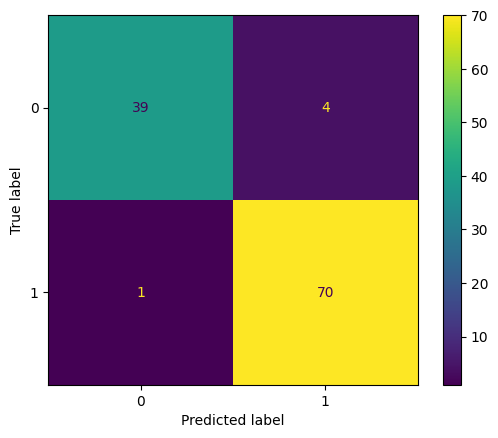

In [17]:
# Select the best model (you can choose based on F1 score)
best_model = grid_search_svm.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
